# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Here we have imported the data using pd.read_csv.The dataset contains the details of the weather along with the mintemp and maxtemp details. It also has the details of the Rainfall,Evaporation,Sunshine etc.

The dataset contains both categorical and numerical columns. Here "Rain Tomorrow"is our traget column, since it has two categories so it termed to be "Rain Tomorrow"where we need predict if an rain will come tomorrow or not.

# Exploratory Data Analysis (EDA)

In [4]:
# Checking dimension of dataset
df.shape

(8425, 23)

The dataset contains 8425 rows and 23 columns. Out of 23 columns 22 are independent columns and remaining one is our target variable "Rain Tomorrow".


In [5]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

This gives the information about the dataset which includes indexing type, column type, non-null values and memory usage.

In [6]:
df.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [7]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-01-31,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


In [8]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


These are the categorical columns in the given dataset

In [9]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


These are the numerical columns in the dataset

In [10]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


These are the unique values present in each column.


In [11]:
# Drop Date column

df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
# Checking null values
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

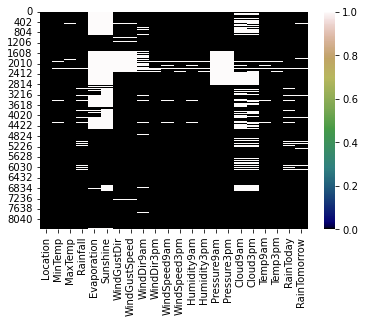

In [13]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(), cmap="gist_earth")
plt.show()

We can clearly observe that apart from Date and Location rest of all the columns have null values present in the data.


In [14]:
df.Sunshine=df.Sunshine.fillna(df.Sunshine.mean())
df.Cloud9am=df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm=df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Evaporation=df.Evaporation.fillna(df.Evaporation.mean())

In [15]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [16]:
for col in df.columns:
    if str(df[col].dtype)=="object":
        print("yes")
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].mean())

yes
yes
yes
yes
yes
yes


In [17]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

None of the columns in the dataset contains any null values.

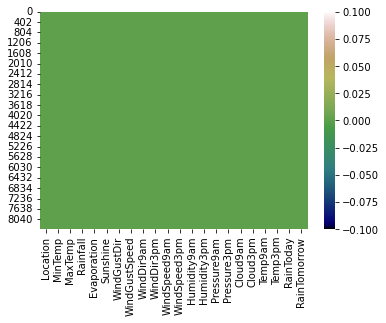

In [18]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(), cmap="gist_earth")
plt.show()

# Univariate Analysis

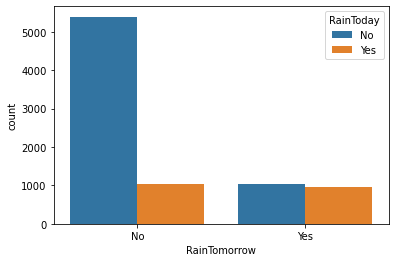

In [19]:
sns.countplot(x = 'RainTomorrow', hue = 'RainToday', data = df)
plt.show()

As per above plot look like the Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model.

# Bi-variate Analysis:

# Sunshine vs Evaporation:

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

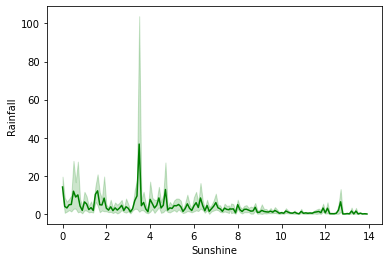

In [20]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')

the Sunshine feature is inversely proportional to the Rainfall feature

# Sunshine vs Evaporation:

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

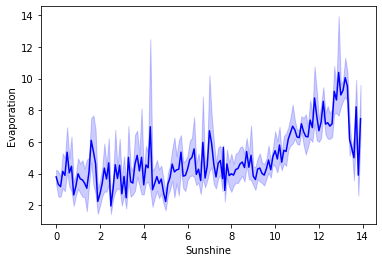

In [21]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue')

In the above line plot, the Sunshine feature is proportional to the Evaporation feature.

# Multivariate Analysis

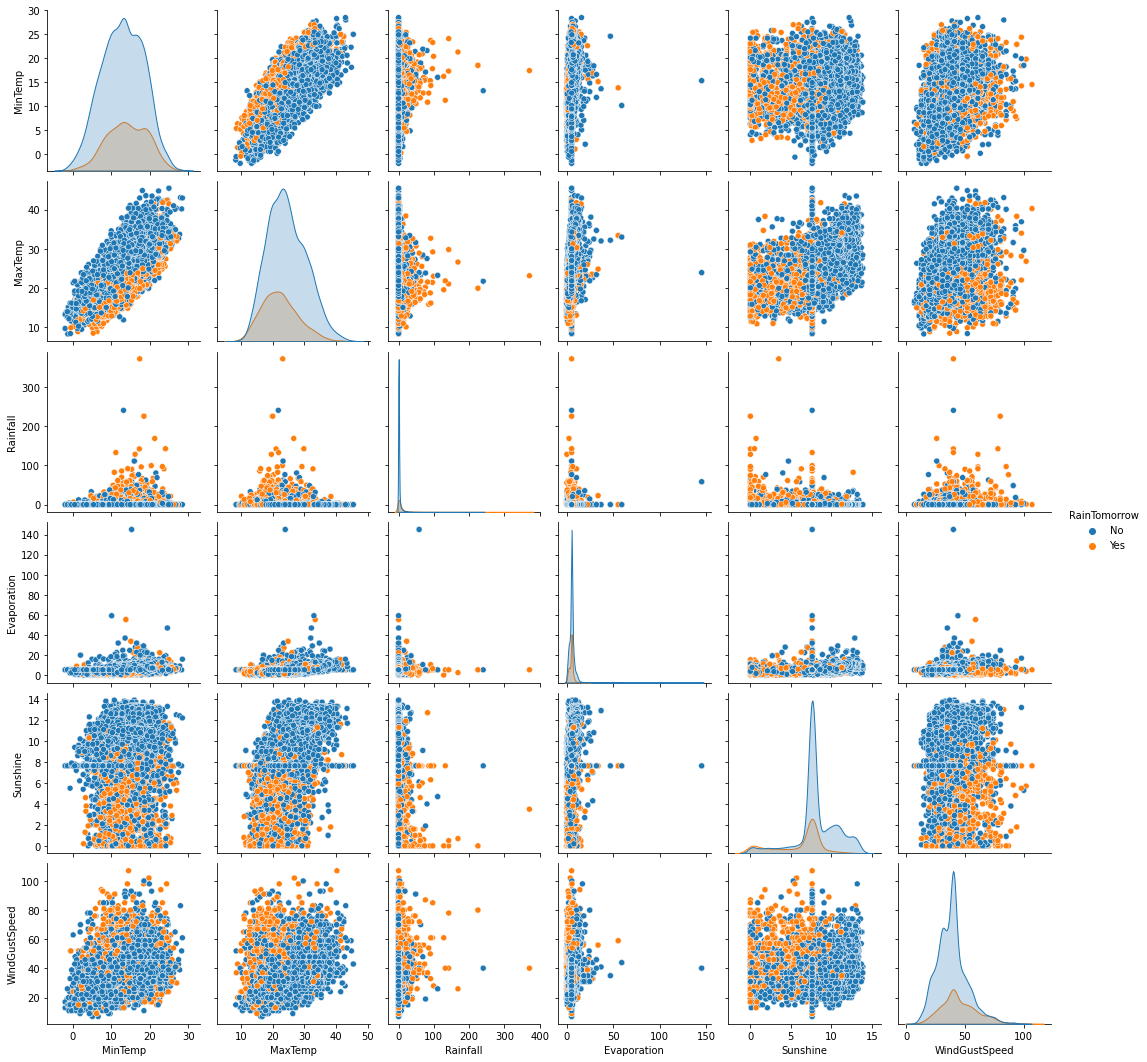

In [22]:
sns.pairplot(x_vars =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             y_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             data = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','RainTomorrow']],
             hue = 'RainTomorrow')
plt.show()

We can clearly observe that there are no null values present in the data.

# Outliers

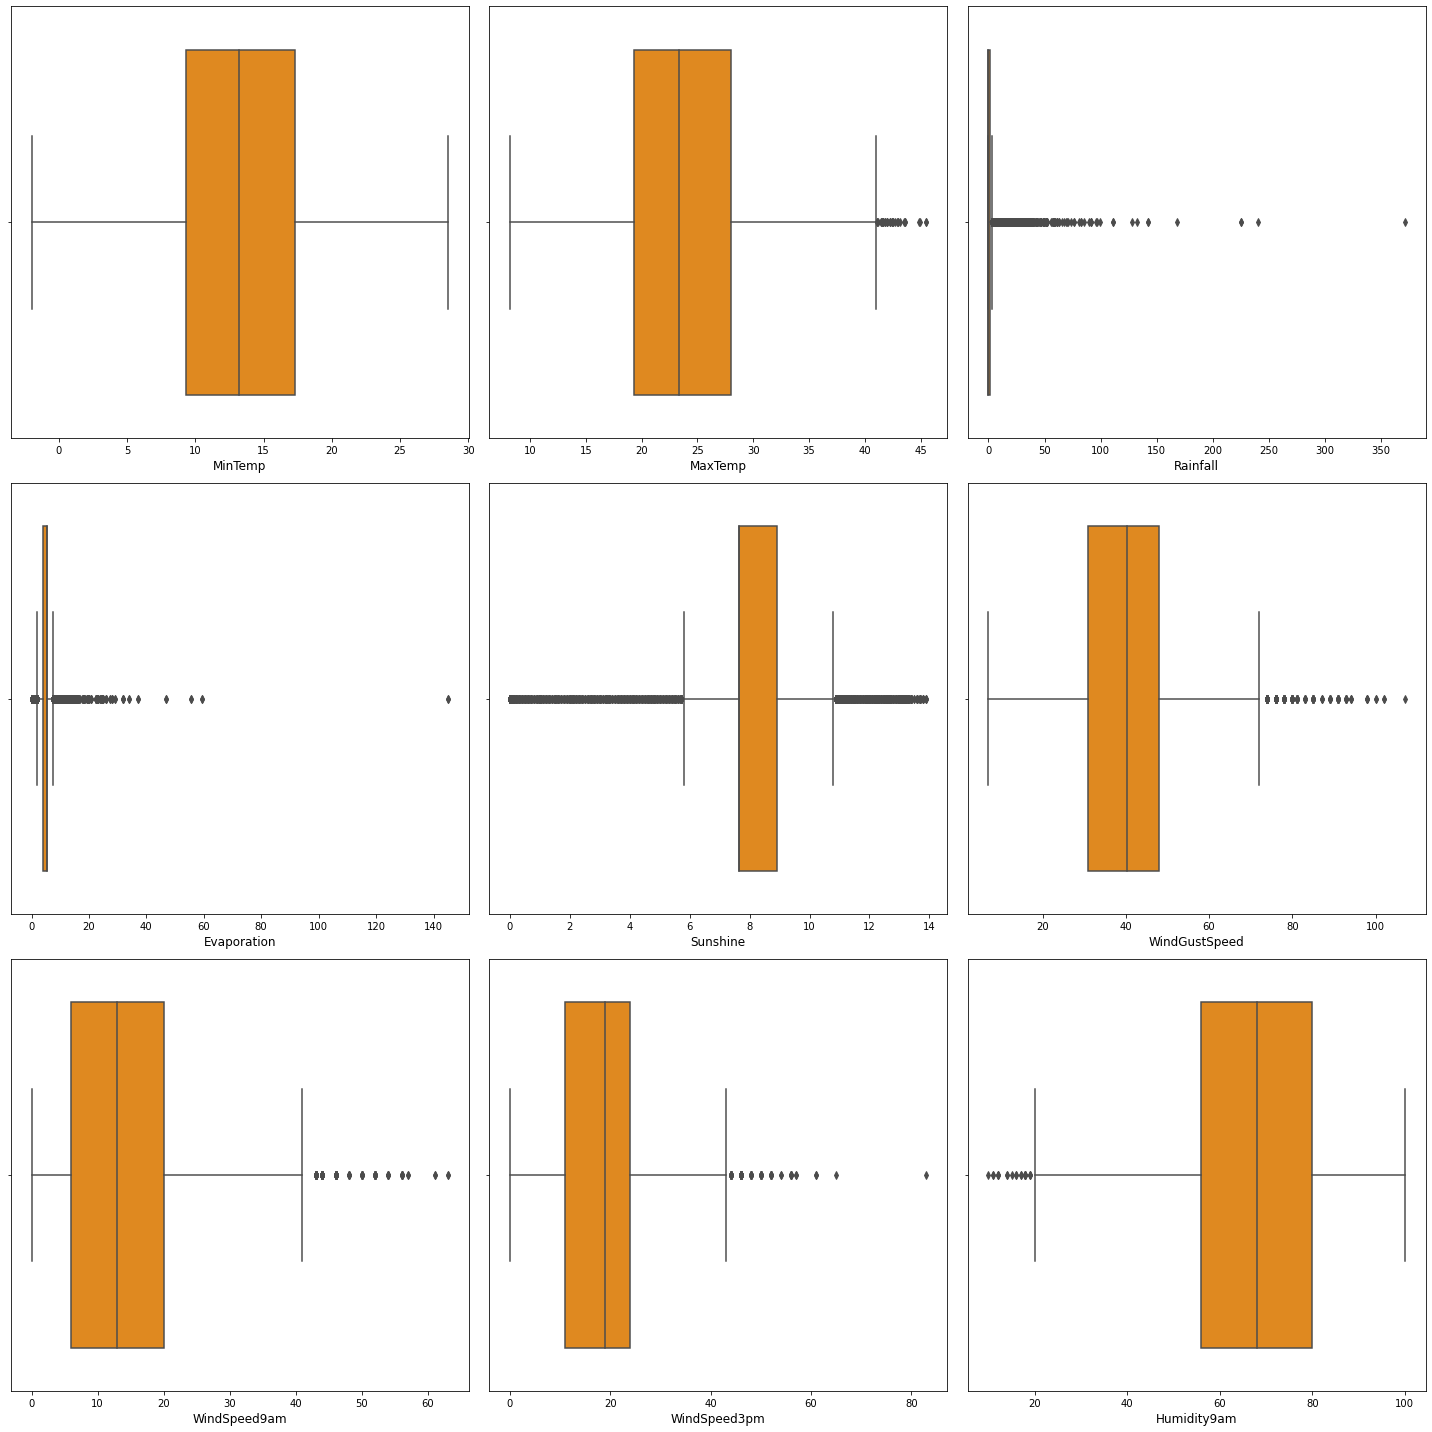

In [23]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can notice the outliers present in all the columns except MinTemp. Let's remove outliers using Zscore method.

# Removing outliers

# 1.Zscore method

In [24]:
# Features containing outliers
features = df[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am']]

In [25]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am
0,1.570089e-01,0.213986,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439
1,2.028121e-01,0.272189,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268
2,3.009450e-01,0.272189,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981
3,6.771214e-01,0.272189,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650
4,1.380408e+00,0.175183,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246
...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.272189,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937
8421,2.355231e-01,0.272189,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843
8422,4.972110e-01,0.272189,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699
8423,5.135665e-01,0.272189,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937


Outliers are removed from dataset

In [26]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [27]:
# Shape of original dataset
df.shape

(8425, 22)

Before removing the outliers we had 8425 rows and 22 columns in our dataset.

In [28]:
# Shape of new dataframe
new_df.shape

(8047, 22)

After removing the outliers we have 8047 rows and 22 columns.

In [29]:
# Checking the the data loss
data_loss = (8425-8047)/8425*100
data_loss

4.4866468842729965

The data loss is 4.48% which is less than 10% and feasible.

# 2. IQR (Inter Quantile Range) method

In [30]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
df1.shape

(4330, 22)

Using IQR method the dataframe has 4330 rows and 22 columns.

In [32]:
# Let's check the dataloss
data_loss = (8425-4330)/8425*100
data_loss

48.6053412462908

The data loss is 48.60% which is very high. so considering Z score method for outliers removal.

# Checking skewness in the data

In [33]:
# Checking the skewness
new_df.skew()

MinTemp         -0.075800
MaxTemp          0.336097
Rainfall         3.491550
Evaporation      0.852267
Sunshine        -0.725516
WindGustSpeed    0.510087
WindSpeed9am     0.708988
WindSpeed3pm     0.304205
Humidity9am     -0.231942
Humidity3pm      0.121966
Pressure9am      0.037567
Pressure3pm      0.045681
Cloud9am        -0.356367
Cloud3pm        -0.266237
Temp9am         -0.026383
Temp3pm          0.357287
dtype: float64

# Removing Skewness using yeo-johnson method

In [34]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ["Evaporation","WindGustSpeed","WindSpeed9am","Rainfall","Sunshine",'Temp3pm']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [35]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,Evaporation,WindGustSpeed,WindSpeed9am,Rainfall,Sunshine,Temp3pm
0,0.187929,0.430878,0.781440,0.619106,-0.098068,-0.021744
1,0.187929,0.430878,-0.986808,-0.693061,-0.098068,0.395264
2,0.187929,0.575617,0.697286,-0.693061,-0.098068,0.214957
3,0.187929,-1.254963,-0.067051,-0.693061,-0.098068,0.742329
4,0.187929,0.207373,-0.544982,0.976866,-0.098068,1.218766


In [36]:
# Checking skewness after using yeo-johnson ethod
new_df[skew].skew()

Evaporation      0.073165
WindGustSpeed    0.002393
WindSpeed9am    -0.111613
Rainfall         0.915235
Sunshine        -0.065800
Temp3pm         -0.011993
dtype: float64

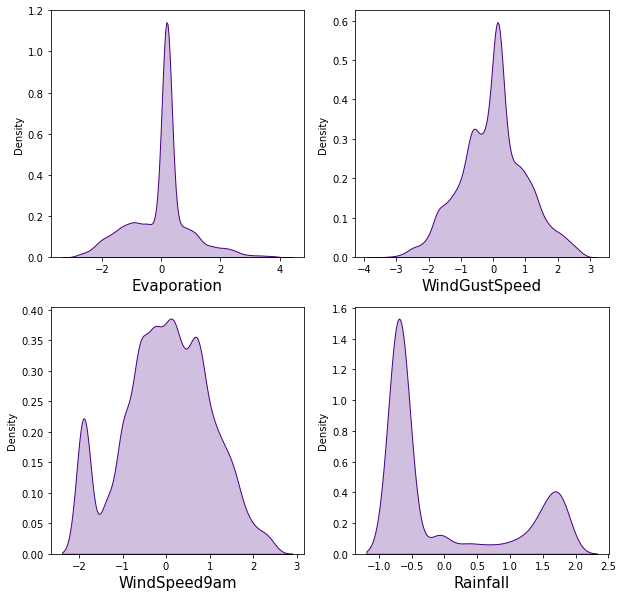

In [37]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Encoding of Categorical Features:

In [38]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

df['Location'].replace(encode_data('Location'), inplace = True)


# Correlation between the target variable and features using HEAT map

In [39]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720703,0.076444,0.375422,0.087864,0.252158,0.162689,0.188642,-0.131554,0.086661,-0.435776,-0.430736,0.089458,0.035624,0.889631,0.694207
MaxTemp,0.720703,1.000000,-0.237981,0.474175,0.401656,0.154199,0.020944,0.095670,-0.386074,-0.411540,-0.333402,-0.410958,-0.250984,-0.248192,0.865701,0.970986
Rainfall,0.076444,-0.237981,1.000000,-0.194940,-0.268828,0.097197,0.050098,0.049816,0.400891,0.378517,-0.130942,-0.052227,0.306165,0.265380,-0.103635,-0.251001
Evaporation,0.375422,0.474175,-0.194940,1.000000,0.386458,0.186324,0.084793,0.094294,-0.315564,-0.227093,-0.267963,-0.282124,-0.108071,-0.143088,0.444112,0.454584
Sunshine,0.087864,0.401656,-0.268828,0.386458,1.000000,0.028867,0.026238,0.059710,-0.391266,-0.438548,-0.004307,-0.063652,-0.544452,-0.555139,0.284365,0.418610
WindGustSpeed,0.252158,0.154199,0.097197,0.186324,0.028867,1.000000,0.539572,0.634104,-0.277409,-0.088181,-0.381260,-0.341244,0.009189,0.059792,0.223541,0.109465
WindSpeed9am,0.162689,0.020944,0.050098,0.084793,0.026238,0.539572,1.000000,0.551411,-0.363814,-0.095376,-0.151028,-0.109812,-0.003590,0.038883,0.131149,-0.003236
WindSpeed3pm,0.188642,0.095670,0.049816,0.094294,0.059710,0.634104,0.551411,1.000000,-0.245659,-0.081588,-0.234600,-0.183576,0.005898,-0.001558,0.192865,0.071498
Humidity9am,-0.131554,-0.386074,0.400891,-0.315564,-0.391266,-0.277409,-0.363814,-0.245659,1.000000,0.627010,0.134829,0.164730,0.403130,0.301231,-0.373595,-0.376191
Humidity3pm,0.086661,-0.411540,0.378517,-0.227093,-0.438548,-0.088181,-0.095376,-0.081588,0.627010,1.000000,-0.010324,0.057600,0.415951,0.437178,-0.117899,-0.471524


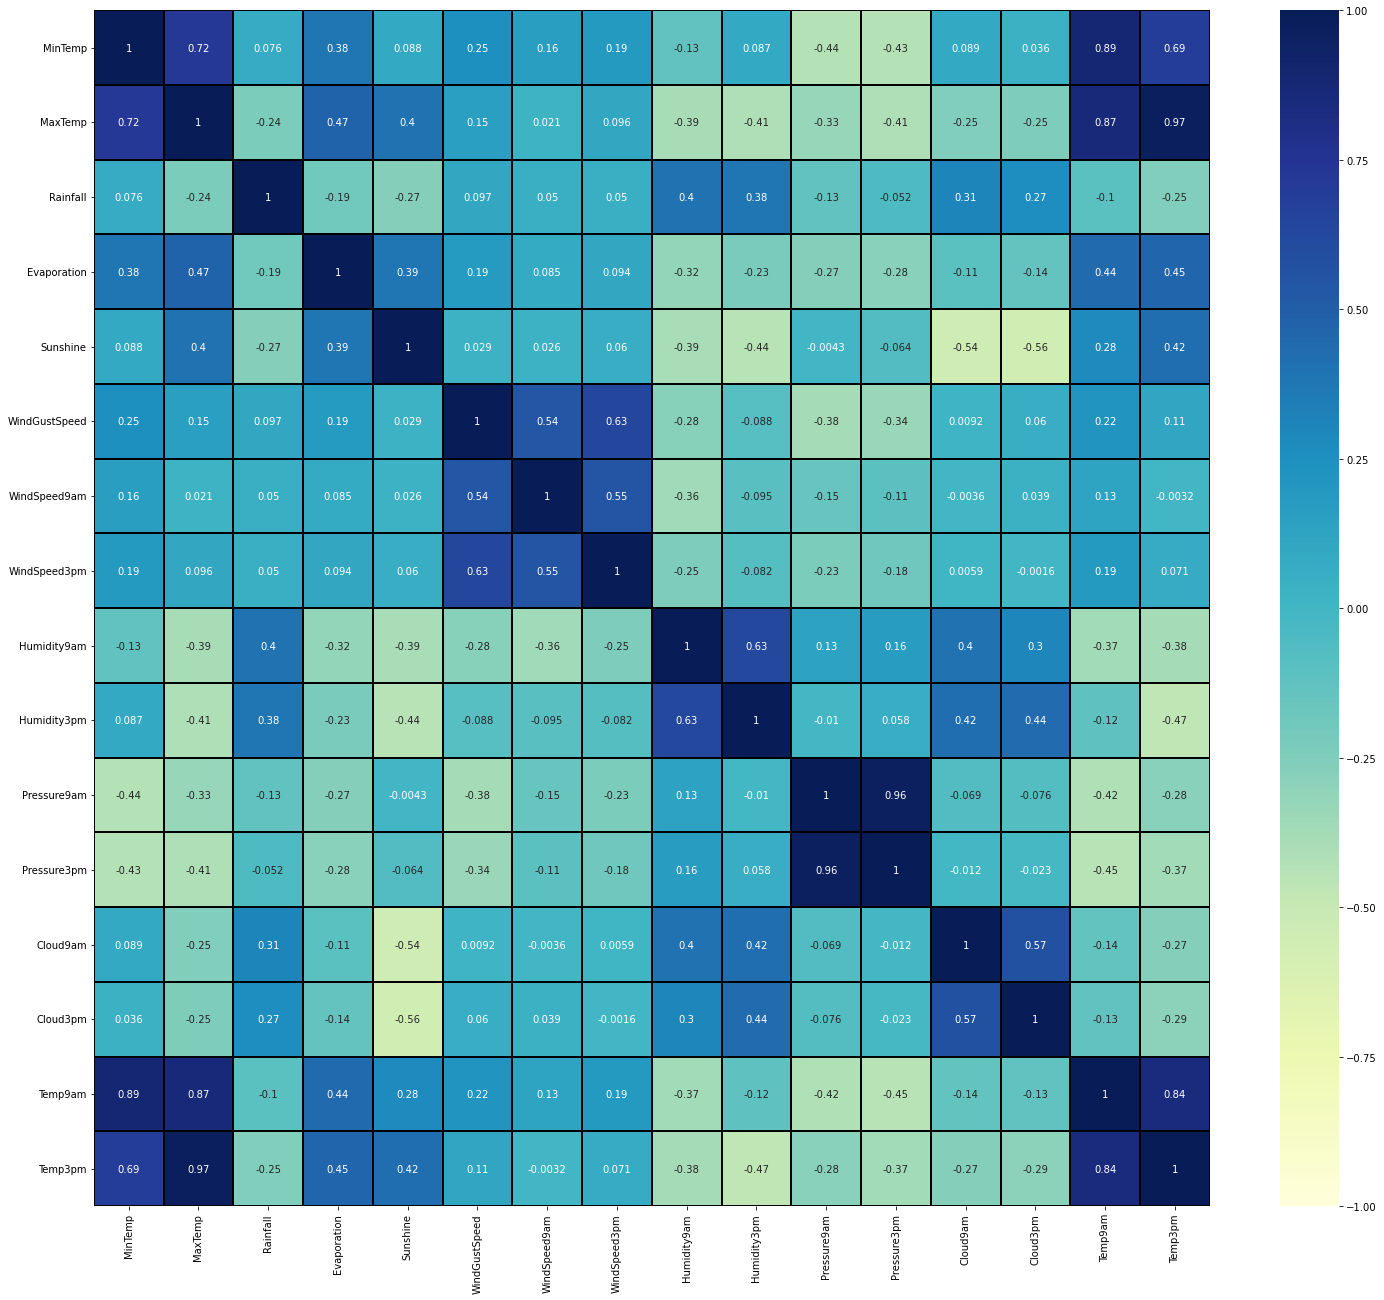

In [40]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

There is high correlation between

Pressure9am and Presure3pm

Temp9am and temp3pm

Mintemp and temp3pm

Maxtemp and temp3pm






# Visualizing the correlation between capacity_mw and features using bar plot

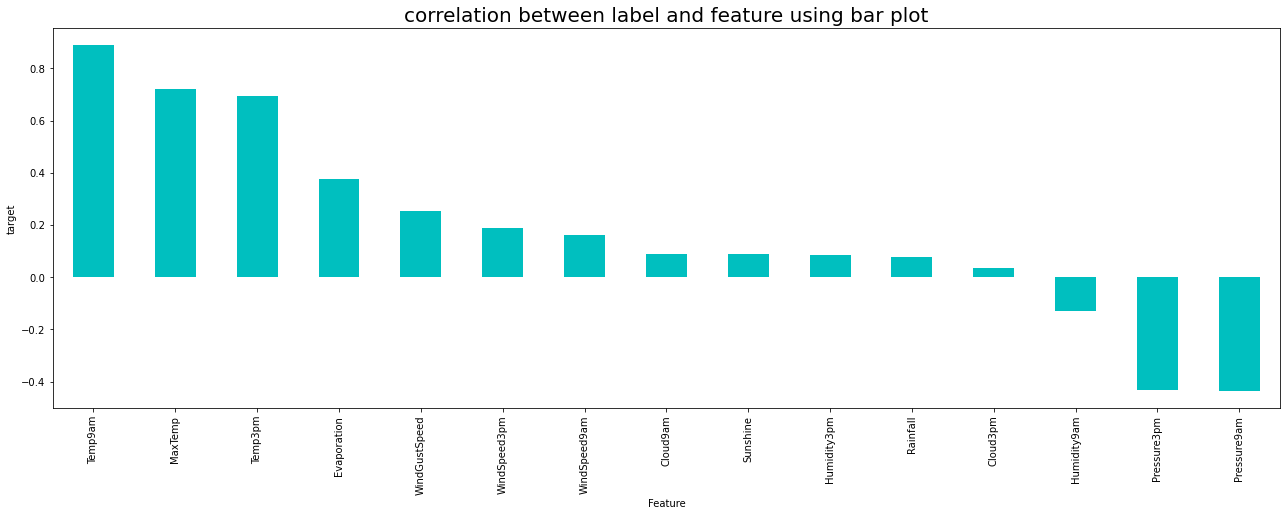

In [41]:
plt.figure(figsize=(22,7))
new_df.corr()['MinTemp'].sort_values(ascending=False).drop(['MinTemp']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

The bar plot to check the correlation between MinTemp and features. Here we can easily notice the positive and negative correlation between the features and the label.

# Splitting data into Independent Features and Dependent Features:

In [43]:
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [45]:
# Dimension of x
X.shape

(8425, 21)

In [46]:
# Dimension of y
y.shape

(8425,)

# Feature Scaling using Standard Scalarization

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.595715,0.038425,-1.570089e-01,-0.213986,2.305893e-16,1.257472e-15,-1.630720,0.277710,-1.819595,-1.680757,...,0.563297,0.189439,-1.597406,-1.584003,-1.308665,1.413459,3.862851e-16,-0.153712,-0.108138,-0.556099
1,-1.595715,-1.076989,2.028121e-01,-0.272189,2.305893e-16,1.257472e-15,-1.401866,0.277710,-1.582493,-1.465590,...,0.357200,-1.420268,-1.433568,-1.121880,-1.196072,0.000000,3.862851e-16,-0.100217,0.312348,-0.556099
2,-1.595715,-0.054526,3.009450e-01,-0.272189,2.305893e-16,1.257472e-15,-1.173012,0.422897,-1.819595,-1.465590,...,0.769394,-1.777981,-1.160505,-1.599939,-1.051309,0.000000,-1.088680e+00,0.577390,0.127334,-0.556099
3,-1.595715,-0.742365,6.771214e-01,-0.272189,2.305893e-16,1.257472e-15,-0.944157,-1.174166,-1.345391,-1.250422,...,-0.982428,-1.360650,-1.925081,-0.006411,-0.391836,0.000000,3.862851e-16,0.060269,0.682376,-0.556099
4,-1.595715,0.800625,1.380408e+00,-0.175183,2.305893e-16,1.257472e-15,-1.630720,0.059928,-1.108288,-1.035255,...,0.151104,0.845246,-0.996668,-1.090010,-1.485596,1.001777,1.520830e+00,0.006773,1.220599,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.084703,-1.932140,-7.523137e-02,-0.272189,2.305893e-16,1.257472e-15,1.573242,-0.666009,-1.345391,-0.174586,...,-0.776331,-1.002937,-1.488181,1.109058,0.814518,0.000000,3.862851e-16,-1.366273,-0.007221,-0.556099
8421,2.084703,-1.783418,2.355231e-01,-0.272189,2.305893e-16,1.257472e-15,-0.715303,-1.319354,-1.345391,0.901251,...,-0.982428,-0.704843,-1.652018,0.933770,0.621501,0.000000,3.862851e-16,-1.223619,0.345987,-0.556099
8422,2.084703,-1.448794,4.972110e-01,-0.272189,2.305893e-16,1.257472e-15,-0.486448,-0.230447,-1.345391,-1.680757,...,-0.982428,-0.883699,-1.488181,0.535388,0.251553,0.000000,3.862851e-16,-0.938310,0.615099,-0.556099
8423,2.084703,-1.002628,5.135665e-01,-0.272189,2.305893e-16,1.257472e-15,1.115533,-0.883791,-0.634083,0.901251,...,-1.188525,-1.002937,-1.488181,0.280424,0.203299,-0.644950,-1.088680e+00,-0.474684,0.598279,-0.556099


# Modeling

# Creating new train test split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.0323896 , 0.03299348, 0.03330987, 0.03552424, 0.02728874,
       0.0419736 , 0.03262702, 0.06165054, 0.03614955, 0.03772218,
       0.03823854, 0.04013745, 0.04470288, 0.19786768, 0.03408816,
       0.04051614, 0.03218489, 0.06713832, 0.03131726, 0.034471  ,
       0.06770887])

<AxesSubplot:>

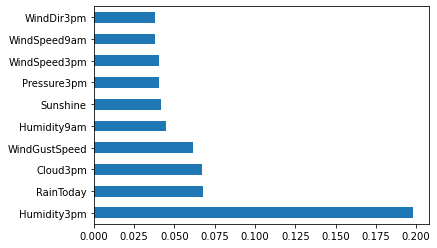

In [55]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

# Training with Different Models

In [81]:
features = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [82]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [83]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

# LogisticRegression

Accuracy = 0.8215472235405791
ROC Area under Curve = 0.7010771620531305
Cohen's Kappa = 0.4468511166564959
Time taken = 0.05921506881713867
              precision    recall  f1-score   support

           0    0.85251   0.92751   0.88843      1614
           1    0.66667   0.47465   0.55450       493

    accuracy                        0.82155      2107
   macro avg    0.75959   0.70108   0.72146      2107
weighted avg    0.80902   0.82155   0.81029      2107



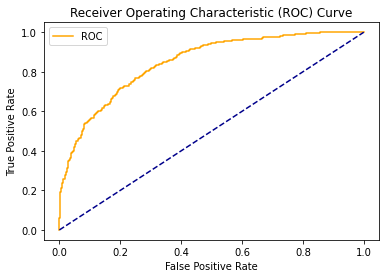

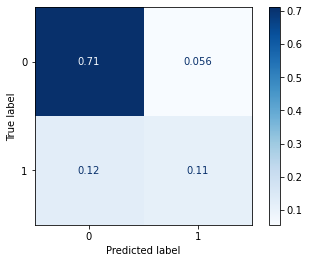

In [84]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# DecisionTreeClassifier

Accuracy = 0.8120550545799715
ROC Area under Curve = 0.7371459415710906
Cohen's Kappa = 0.474961017190192
Time taken = 0.014089345932006836
              precision    recall  f1-score   support

           0    0.87686   0.87794   0.87740      1614
           1    0.59878   0.59635   0.59756       493

    accuracy                        0.81206      2107
   macro avg    0.73782   0.73715   0.73748      2107
weighted avg    0.81179   0.81206   0.81192      2107



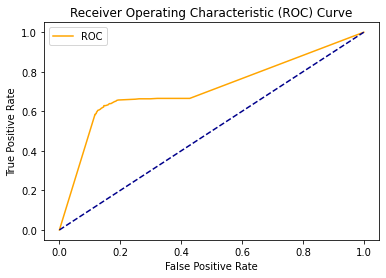

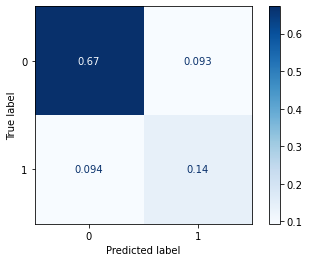

In [85]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network

Accuracy = 0.8372093023255814
ROC Area under Curve = 0.7768102882737508
Cohen's Kappa = 0.5493638288121168
Time taken = 7.654492139816284
              precision    recall  f1-score   support

           0    0.89644   0.89033   0.89338      1614
           1    0.64881   0.66329   0.65597       493

    accuracy                        0.83721      2107
   macro avg    0.77263   0.77681   0.77467      2107
weighted avg    0.83850   0.83721   0.83783      2107



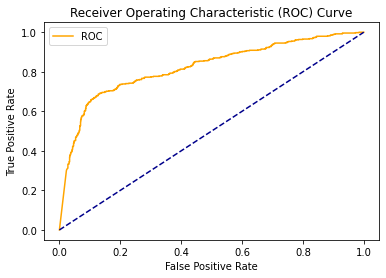

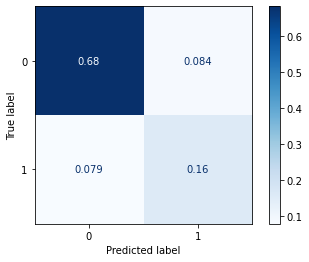

In [86]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# RandomForestClassifier

Accuracy = 0.8799240626483151
ROC Area under Curve = 0.7870810931730723
Cohen's Kappa = 0.6315504269782519
Time taken = 0.705735445022583
              precision    recall  f1-score   support

           0    0.89042   0.96159   0.92464      1614
           1    0.82967   0.61258   0.70478       493

    accuracy                        0.87992      2107
   macro avg    0.86004   0.78708   0.81471      2107
weighted avg    0.87620   0.87992   0.87319      2107



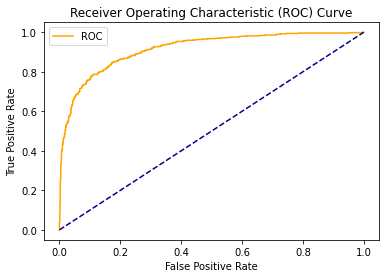

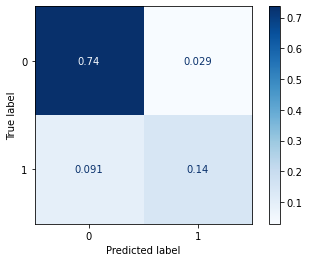

In [87]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# XGBOOST

Accuracy = 0.8875177978168012
ROC Area under Curve = 0.8173964624947531
Cohen's Kappa = 0.669204694578791
Time taken = 1.854501724243164
              precision    recall  f1-score   support

           0    0.90812   0.94919   0.92820      1614
           1    0.80476   0.68560   0.74042       493

    accuracy                        0.88752      2107
   macro avg    0.85644   0.81740   0.83431      2107
weighted avg    0.88394   0.88752   0.88426      2107



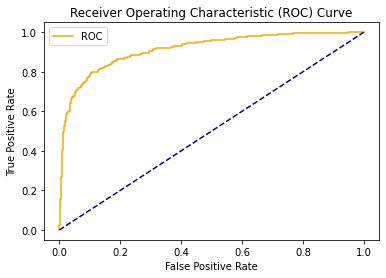

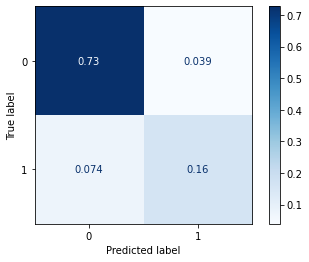

In [90]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.84018987 0.84098101 0.81091772 0.82977039 0.83927158]
Average cross-validation score: 0.8322261142347435


# Hyper parameter tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [93]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [95]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [97]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [106]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(X_train, y_train)
pred = capacity.predict(X_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.6029511349945924
R2_Score: 34.337323155056076


# Saving the model

In [108]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Rain_Prediction_Weather_Forecasting.pkl")

['Rain_Prediction_Weather_Forecasting.pkl']

In [110]:
# Loading the saved model
model=joblib.load("Rain_Prediction_Weather_Forecasting.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0.25328172, 0.16539812, 0.13869324, ..., 0.42910624, 0.20824772,
       0.125765  ])